## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
rows = df.shape[0]
print(f"The number of rows in the dataset: {rows}")

The number of rows in the dataset: 69889


`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [4]:
converted_prob = df["converted"].mean()
print(f"The proportion of user converted: {converted_prob * 100:.2f}")

The proportion of user converted: 13.05


`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [5]:
missing_vals = df.isnull().sum().sum()
print(f"Number of missing rows: {missing_vals}")

Number of missing rows: 0


`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [6]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts

country_counts = df["country"].value_counts()

print(f"Visitors from US: {country_counts['US']}")
print(f"Visitors from UK: {country_counts['UK']}")
print(f"Visitors from Canada: {country_counts['CA']}")

Visitors from US: 48850
Visitors from UK: 17551
Visitors from Canada: 3488


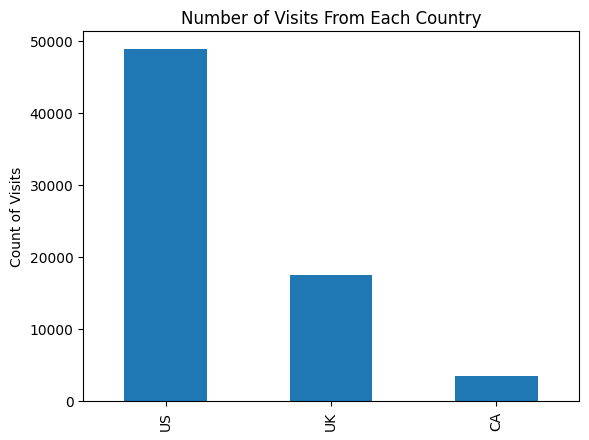

In [7]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [8]:
df.dtypes

country      object
group        object
converted     int64
dtype: object

In [9]:
print(f"The column converted is not of categorical data type, and its type is: {df['converted'].dtypes}")

The column converted is not of categorical data type, and its type is: int64


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [10]:
df["converted"].unique()

array([0, 1])

In [11]:
print("There are two possible values of the converted column, 0 and 1\n")

print("This make sense as it indicates binary values, representing whether the users are converted and not converted users.")

There are two possible values of the converted column, 0 and 1

This make sense as it indicates binary values, representing whether the users are converted and not converted users.


<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [12]:
# Probability of conversin regardless of page or country

conversion_probability = df["converted"].mean()

print(f"The probability of an individual conversion is: {conversion_probability}")

The probability of an individual conversion is: 0.13047832992316388


`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [13]:
control_group_mean = df.query("group == 'control'")["converted"].mean()
control_group_mean

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [14]:
# Conversion probability of an individual in treatment group

treatment_group = df.query("group == 'treatment'")["converted"]
treatment_group_mean = treatment_group.mean()
print(f"The probability of an individual conversion in the in the treatment group is: {treatment_group_mean}")

The probability of an individual conversion in the in the treatment group is: 0.15532078043793132


`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [15]:
print(f"The conversion rate for control group is {control_group_mean *100:.2f}")
print(f"The conversion rate for treatment group is {treatment_group_mean *100:.2f}")
print("Hence we can observe a higher conversion rate in treatment group than the control group.")

The conversion rate for control group is 10.53
The conversion rate for treatment group is 15.53
Hence we can observe a higher conversion rate in treatment group than the control group.


`e)` What is the probability that an individual was in the `treatment`?

In [16]:
# Probability of an individual in treatment

treatment_probability = df.query("group == 'treatment'").shape[0] / df.shape[0]

print(f"The probability of an individual being in treatment is: {treatment_probability}")

The probability of an individual being in treatment is: 0.5038131894861853


`f)` What is the probability that an individual was from Canada `CA`?

In [17]:
# Probability of inidividual was from Canada

users_CA = df.query("country == 'CA'").shape[0] / df.shape[0]

print(f"The probability that an individual was from Canada is: {users_CA}")

The probability that an individual was from Canada is: 0.04990771079855199


`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [18]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [19]:
# Conversion rate from UK

converted_UK = df.query('country == "UK"')['converted'].mean()

print(f"The probability that an individual from UK and is converted: {converted_UK}")

The probability that an individual from UK and is converted: 0.12512107572218106


`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [20]:
# Conversion rate from Canada
converted_CA = df.query('country == "CA"')['converted'].mean()

print(f"The probability that an individual from CA and is converted: {converted_CA}")

The probability that an individual from CA and is converted: 0.1252866972477064


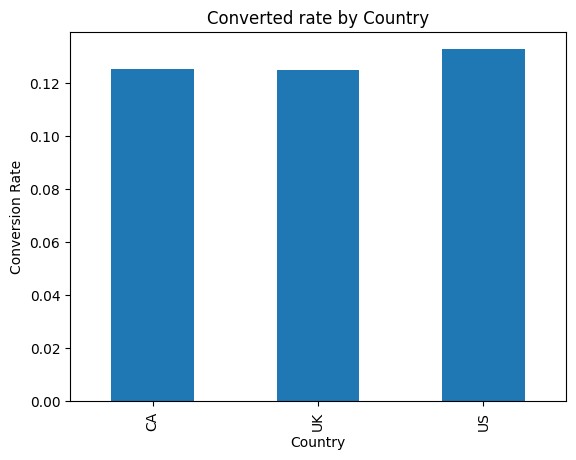

In [21]:
# Converted rates differ from one country to another country

converted_all = df.groupby("country")["converted"].mean()

converted_all.plot(kind="bar")

plt.title("Converted rate by Country")
plt.xlabel("Country")
plt.ylabel("Conversion Rate")

plt.show();

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [22]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [23]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [24]:
# UK conversion rates

uk_conversion = df.query('country == "UK"').groupby('group')['converted'].mean() * 100
uk_conversion

group
control      10.164866
treatment    14.869804
Name: converted, dtype: float64

In [25]:
# Canada conversion rates

ca_conversion = df.query('country == "CA"').groupby('group')['converted'].mean() * 100
ca_conversion

group
control       9.447415
treatment    15.401662
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       | 10.2%       |  9.4%       |
| Treatment   | 15.8%       | 14.9%       |  15.4%      |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [26]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

In [27]:
p_control_treatment_null, n_treatment, n_control

(0.13047832992316388, 35211, 34678)

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [28]:
treatment_converted = np.random.choice([0, 1], size=n_treatment, p=[1 - p_control_treatment_null, p_control_treatment_null])
treatment_converted[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [29]:
control_converted = np.random.choice([0, 1], size=n_control, p=[1 - p_control_treatment_null, p_control_treatment_null])
control_converted[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [30]:
# Estimate difference in conversion rates

p_treatment = np.mean(treatment_converted)
p_control = np.mean(control_converted)
diff = p_treatment - p_control

diff

-0.002416028097092404

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [31]:
# Simulate 500 p_diffs 

p_diffs = []
    
for _ in range(500):
    treatment_converted = np.random.choice([0, 1], size=n_treatment, p=[1 - p_control_treatment_null, p_control_treatment_null])
    control_converted = np.random.choice([0, 1], size=n_control, p=[1 - p_control_treatment_null, p_control_treatment_null])

    p_treatment = np.mean(treatment_converted)
    p_control = np.mean(control_converted)

    diff = p_treatment - p_control
    p_diffs.append(diff)

p_diffs = np.array(p_diffs)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

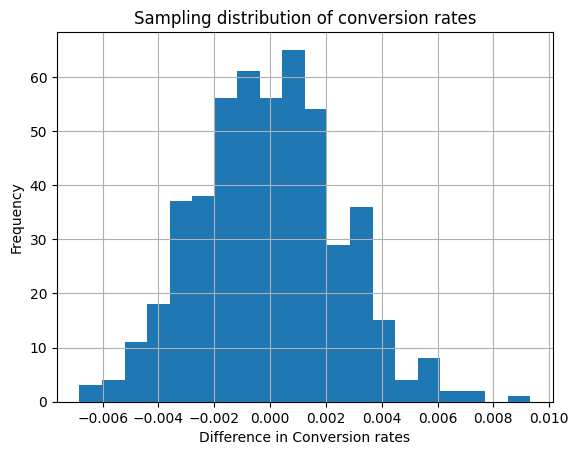

In [32]:
# Histogram plot of p_diffs

p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)
plt.xlabel("Difference in Conversion rates")
plt.ylabel("Frequency")
plt.title("Sampling distribution of conversion rates")
plt.show()

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [33]:
# Compute p-value

observed_diff = df.query("group == 'treatment'")["converted"].mean() - df.query("group == 'control'")["converted"].mean()

p_value = (p_diffs > observed_diff).mean()
p_value

0.0

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**p-value was computed above. The p-value is the probability if the null hypothesis is true. The p-value computed above is 0.0 which is less than Type 1 error rate of 0.05, hence rejecting the null hypothesis. It also shows that the there is a significant difference between the new and old.**

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is either a conversion or no conversion representing a binary outcome, Logistic regression should be performed. Logistic regression is used to estimate the probability of binary outcomes.**

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [34]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [35]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [36]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [37]:
print(logit_res.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.007     
Dependent Variable: converted        AIC:              53750.8788
Date:               2024-08-26 23:19 BIC:              53769.1882
No. Observations:   69889            Log-Likelihood:   -26873.   
Df Model:           1                LL-Null:          -27068.   
Df Residuals:       69887            LLR p-value:      1.8101e-86
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
intercept   -2.1402    0.0175  -122.3047  0.0000  -2.1745  -2.1059
ab_page      0.4467    0.0229    19.5389  0.0000   0.4019   0.4915



`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**The p-value associated with the ab_page is 0.0 which is very small compared to 0.05. Hence we reject the null hypothesis and conclude that there is a significant difference between the conversion rate for the treatment and control groups. It leads to the same conclusion as we found in the Experiment section.**

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [38]:
### Create the necessary dummy variables
df[["US", "UK"]] = pd.get_dummies(df["country"])[["US", "UK"]].astype(int)
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [39]:
X = df[["intercept", "ab_page", "US", "UK"]]
y = df["converted"]

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [40]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [41]:
print(logit_res.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.007     
Dependent Variable: converted        AIC:              53747.4949
Date:               2024-08-26 23:19 BIC:              53784.1135
No. Observations:   69889            Log-Likelihood:   -26870.   
Df Model:           3                LL-Null:          -27068.   
Df Residuals:       69885            LLR p-value:      1.7779e-85
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
intercept    -2.1930    0.0531  -41.3083  0.0000  -2.2970  -2.0889
ab_page       0.4466    0.0229   19.5338  0.0000   0.4018   0.4914
US            0.0727    0.0530    1.3718  0.1701  -0.0312   0.1766
UK            0.0067    0.0562

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**The p-values associated with US is 0.17 which is greater than 0.05. This implies that the difference between the US conversion rates are not statistically significant. The p-values asscociated with UK is 0.90 is also greater than 0.05 and indicates that the difference in conversion rates between UK and base are not significant. Hence, there is not enough evidence that being in US or UK statistically affects conversion rates compared to Canada**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.